<a href="https://colab.research.google.com/github/nickgioia69/DATA-STATS/blob/main/Nick_Gioia_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb # this is a set of tools
!apt-get install poppler-utils # this is a set of tools
!pip install pdf2image # this is a set of tools
!pip install flashtorch # this is a set of tools 
import requests # this is a set of tools
from pdf2image import convert_from_path # this is a set of tools
import matplotlib.pyplot as plt # this is a set of tools
import numpy as np # this is a set of tools
import torch # this is a set of tools
import requests # this is a set of tools
from torchvision import * # this is a set of tools
from torchvision.models import * # this is a set of tools
from flashtorch.utils import apply_transforms # this is a set of tools
import wandb as wb # this is a set of tools

In [ ]:
def GPU(data): # this defines a function to be carried out 
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) # this is a function to be carried out 

def GPU_data(data): # this defines a function to be carried out 
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda')) # this is a function to be carried out 

def plot(x): # this defines a function to be carried out 
    fig, ax = plt.subplots() # this is used to customize and help plot the graph
    im = ax.imshow(x, cmap = 'gray') # this is used to customize and help plot the graph
    ax.axis('off') # this is used to customize and help plot the graph
    fig.set_size_inches(5, 5) # this is used to customize and help plot the graph
    plt.show() # this shows the graph 
    
def get_google_slide(url): # this defines a function to be carried out 
    url_head = "https://docs.google.com/presentation/d/" # this is used to get the url 
    url_body = url.split('/')[5] # this separates the url 
    page_id = url.split('.')[-1] # this gives us the page ids
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id # this combines the urls 

def get_slides(url): # this defines a function to be carried out 
    url = get_google_slide(url) # this gets the google slides 
    r = requests.get(url, allow_redirects=True) # this allows for it to happen 
    open('file.pdf', 'wb').write(r.content) # this opens the google slides
    images = convert_from_path('file.pdf', 500) # this gets all of the images 
    return images # this outputs the images 

def load(image): # this loads the images 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) # this outputs the images

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # this allows for it to happen 

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} # this is used to get the labels 

model = alexnet(weights='DEFAULT').to(device) # this is used to get the model 
model.eval(); # this allows for it to happen 

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1h8MFyC6MA0yikaNObGaO6fiDmUo4RRvMgz2rwD_4twA/edit#slide=id.g1a19eac424a_0_460" # this is a url 

In [ ]:
url = "https://docs.google.com/presentation/d/1h8MFyC6MA0yikaNObGaO6fiDmUo4RRvMgz2rwD_4twA/edit#slide=id.g1a19eac424a_0_46"

In [ ]:
images = [] # this is an empty set

for image in get_slides(url): # this is a for loop

    plot(image) # this plots the image 

    images.append(load(image)) # this loads the image

images = torch.vstack(images) # this stacks them one after the other 

In [ ]:
images.shape # this is the shape of the images

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) # this is the model of the images 

tensor([[-3.4283, -1.0848, -2.7982,  ..., -3.3361,  0.5099, -0.2546],
        [-1.9600, -1.7439, -1.4766,  ..., -4.0319,  0.9023,  1.0677],
        [-2.1053, -3.5689, -3.3784,  ..., -4.1494,  0.1299,  1.5298],
        ...,
        [-1.2552, -2.8088, -3.4579,  ..., -3.2553, -0.9617, -0.5113],
        [ 1.1313, -4.4376, -1.7741,  ...,  2.7511,  1.2121,  0.7466],
        [ 1.7813, -2.7851, -3.9551,  ...,  0.3307,  2.0000, -2.1075]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) # this assigns the model to variable y 

In [ ]:
y.shape # this is the shape of y

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy() # this gives us the guesses 

In [ ]:
for i in list(guesses): # this is a for loop
    print(labels[i]) # this prints the labels

hair spray
screwdriver
lipstick, lip rouge
forklift
book jacket, dust cover, dust jacket, dust wrapper
palace
nail
monitor
megalith, megalithic structure
web site, website, internet site, site
web site, website, internet site, site
monitor
castle
oscilloscope, scope, cathode-ray oscilloscope, CRO
cinema, movie theater, movie theatre, movie house, picture palace
solar dish, solar collector, solar furnace
steel arch bridge
binder, ring-binder
panpipe, pandean pipe, syrinx
mosque
beer bottle
palace
panpipe, pandean pipe, syrinx
scoreboard
turnstile
lakeside, lakeshore
thatch, thatched roof
birdhouse
thatch, thatched roof
thatch, thatched roof
monitor
barn
greenhouse, nursery, glasshouse
lakeside, lakeshore
thatch, thatched roof
barn
tile roof
barn
thatch, thatched roof
monitor
boathouse
lumbermill, sawmill
television, television system
barn
thatch, thatched roof
fire screen, fireguard
thatch, thatched roof
horse cart, horse-cart
thatch, thatched roof
barn


In [ ]:
Y = np.zeros(50,) # this stores 50 zeroes in Y
Y[25:] = 1 # this assigns ones from the 25th number onward

In [ ]:
Y # this displays Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() # this detaches the model y and stores it in X

In [ ]:
X.shape # this is the shape of X

(50, 1000)

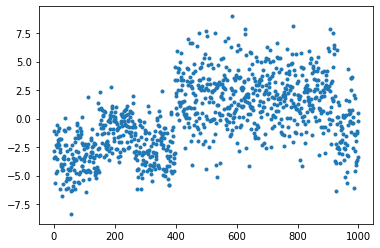

In [ ]:
plt.plot(X[0],'.') # this plots the graph 

In [ ]:
X[0] # this displays the first position in array X

array([-3.42829943e+00, -1.08484960e+00, -2.79822373e+00, -5.61012650e+00,
       -3.34714317e+00, -3.34890151e+00, -4.79462814e+00, -1.38095367e+00,
       -2.28184366e+00, -5.91041803e-01, -4.55908871e+00, -3.54746985e+00,
       -2.48291922e+00, -1.88393867e+00, -2.10172939e+00, -1.08439589e+00,
       -1.77019954e+00, -2.35923147e+00, -8.04837346e-01, -2.68154454e+00,
       -6.15660620e+00, -2.94999862e+00, -1.76999092e+00, -1.78982425e+00,
       -4.01099110e+00, -4.19937801e+00, -6.80316448e+00, -4.47094536e+00,
       -4.28532600e+00, -3.49845362e+00, -5.71827221e+00, -4.49979782e+00,
       -3.52978611e+00, -1.01465583e+00, -3.96928382e+00, -3.30995703e+00,
        7.40572810e-02, -2.33578324e+00, -1.08577180e+00, -2.27975225e+00,
       -5.45519733e+00, -6.13677025e+00, -5.22013521e+00, -2.80047321e+00,
       -4.81618595e+00, -8.47765565e-01, -3.57177591e+00, -4.39350510e+00,
       -6.06538010e+00, -5.27944374e+00, -4.49257565e+00, -8.11150908e-01,
       -5.19684029e+00, -

In [ ]:
np.argmax(X[0]) # this is used to get the max 

585

In [ ]:
labels[585] # this gets the respective label

'hair spray'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10] # this gives us the top ten 

In [ ]:
for i in top_ten: # this is a for loop
    print(labels[i]) # this prints the labels 

hair spray
screwdriver
lighter, light, igniter, ignitor
wine bottle
cinema, movie theater, movie theatre, movie house, picture palace
carpenter's kit, tool kit
digital clock
web site, website, internet site, site
lipstick, lip rouge
coffee mug


In [ ]:
labels # this displays the labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  2.,  37., 135., 162., 209., 184., 155.,  76.,  31.,   9.]),
 array([-8.356031 , -6.623519 , -4.891006 , -3.1584935, -1.4259808,
         0.3065319,  2.0390446,  3.7715573,  5.50407  ,  7.2365828,
         8.969095 ], dtype=float32),
 <a list of 10 Patch objects>)

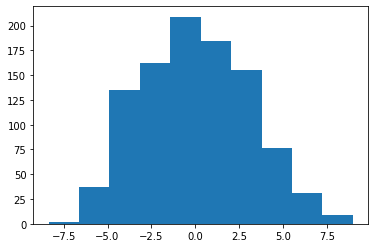

In [ ]:
plt.hist(X[0]) # this plots the histogram 

In [ ]:
X = GPU_data(X) # this assigns gpu data of X to variable X
Y = GPU_data(Y) # this assigns gpu data of Y to variable Y

In [ ]:
def softmax(x): # this defines a funciton to be carried out 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) # this is a funciton to be carried out and stored in variable s1
    s = s1 / s1.sum(1)[:,None] # this is a funciton to be carried out and stored in variable s
    return s # this outputs s 

In [ ]:
def cross_entropy(outputs, labels): # this defines a funciton to be carried out 
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0] # this outputs the result

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers. This defines a funciton to be carried out 
    mu = 0 # this assigns value 0 to variable mu
    sigma = 0.1 # this assigns value 0.1 to variable sigma 
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma) # this is a funciton to be carried out and stored in variable R
    return R.rvs(s) # this outputs the result 

In [ ]:
def Truncated_Normal(size): # this defines a funciton to be carried out 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) # this is a funciton to be carried out and stored in variable u1
    u2 = torch.rand(size) # this is a funciton to be carried out and stored in variable u2
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2) # this is a funciton to be carried out and stored in variable z

    return z # this outputs the result 

In [ ]:
def acc(out,y): # this defines a funciton to be carried out 
    with torch.no_grad(): # this uses a directory to carry out another function
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0] # this outputs the result

In [ ]:
X.shape # this is the shape of X

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): # this defines a funciton to be carried out 
    b = c.b # this assigns the product of c and b to variable b
    if mode == "train": # this is a nested if then else statement 
        r = np.random.randint(X.shape[0]-b) # this is a funciton to be carried out and stored in variable r
        x = X[r:r+b,:] # this is a funciton to be carried out and stored in variable x
        y = Y[r:r+b] # this is a funciton to be carried out and stored in variable y
    elif mode == "test": # this is a nested else if then statement 
        r = np.random.randint(X_test.shape[0]-b) # this is a funciton to be carried out and stored in variable r
        x = X_test[r:r+b,:] # this is a funciton to be carried out and stored in variable x
        y = Y_test[r:r+b] # this is a funciton to be carried out and stored in variable y
    return x,y # this outputs x and y 

In [ ]:
def model(x,w): # this defines a funciton to be carried out 

    return x@w[0] # this outputs the result and is another way of matrix multiplication

In [ ]:
def make_plots(): # this defines a funciton to be carried out 
    
    acc_train = acc(model(x,w),y) # this is a test data set that is stored in variable acc train
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train}) # this logs the data 

In [ ]:
wb.init(project="Linear_Model_Photo_1"); # this holdsthe first linear model photo
c = wb.config # this assigns the configuration to variable c 

c.h = 0.001 # this assigns the value 0.001 to the variable c.h
c.b = 32 # this assigns the value 32 to the variable c.b
c.epochs = 100000 # this assigns the value 100000 to the variable c.epochs

w = [GPU(Truncated_Normal((1000,2)))] # this stores the truncated normal gpu data in variable w

optimizer = torch.optim.Adam(w, lr=c.h) # this optimizes the data and stores it in variable optimizer 

for i in range(c.epochs): # this is a for loop

    x,y = get_batch('train') # this gets a batch of test data and stores in in variable x,y

    loss = cross_entropy(softmax(model(x,w)),y) # this calculates the loss 

    optimizer.zero_grad() # this optimizes the gradient of 0
    loss.backward() # this is the loss backwards 
    optimizer.step() # this helps optimize the data 
   
    wb.log({"loss": loss}) # this logs the loss 

    make_plots() # this plots the graphs


acc_train,▂▃▁▇▇▇▇▇▇▇▇█████████████████▇▇████▇█████
loss,▇▆█▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▂▁▁▁▁▁
acc_train,0.9375
loss,0.37576


<ipython-input-4-11e8853c2f81>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda')) # this is a function to be carried out


# Best
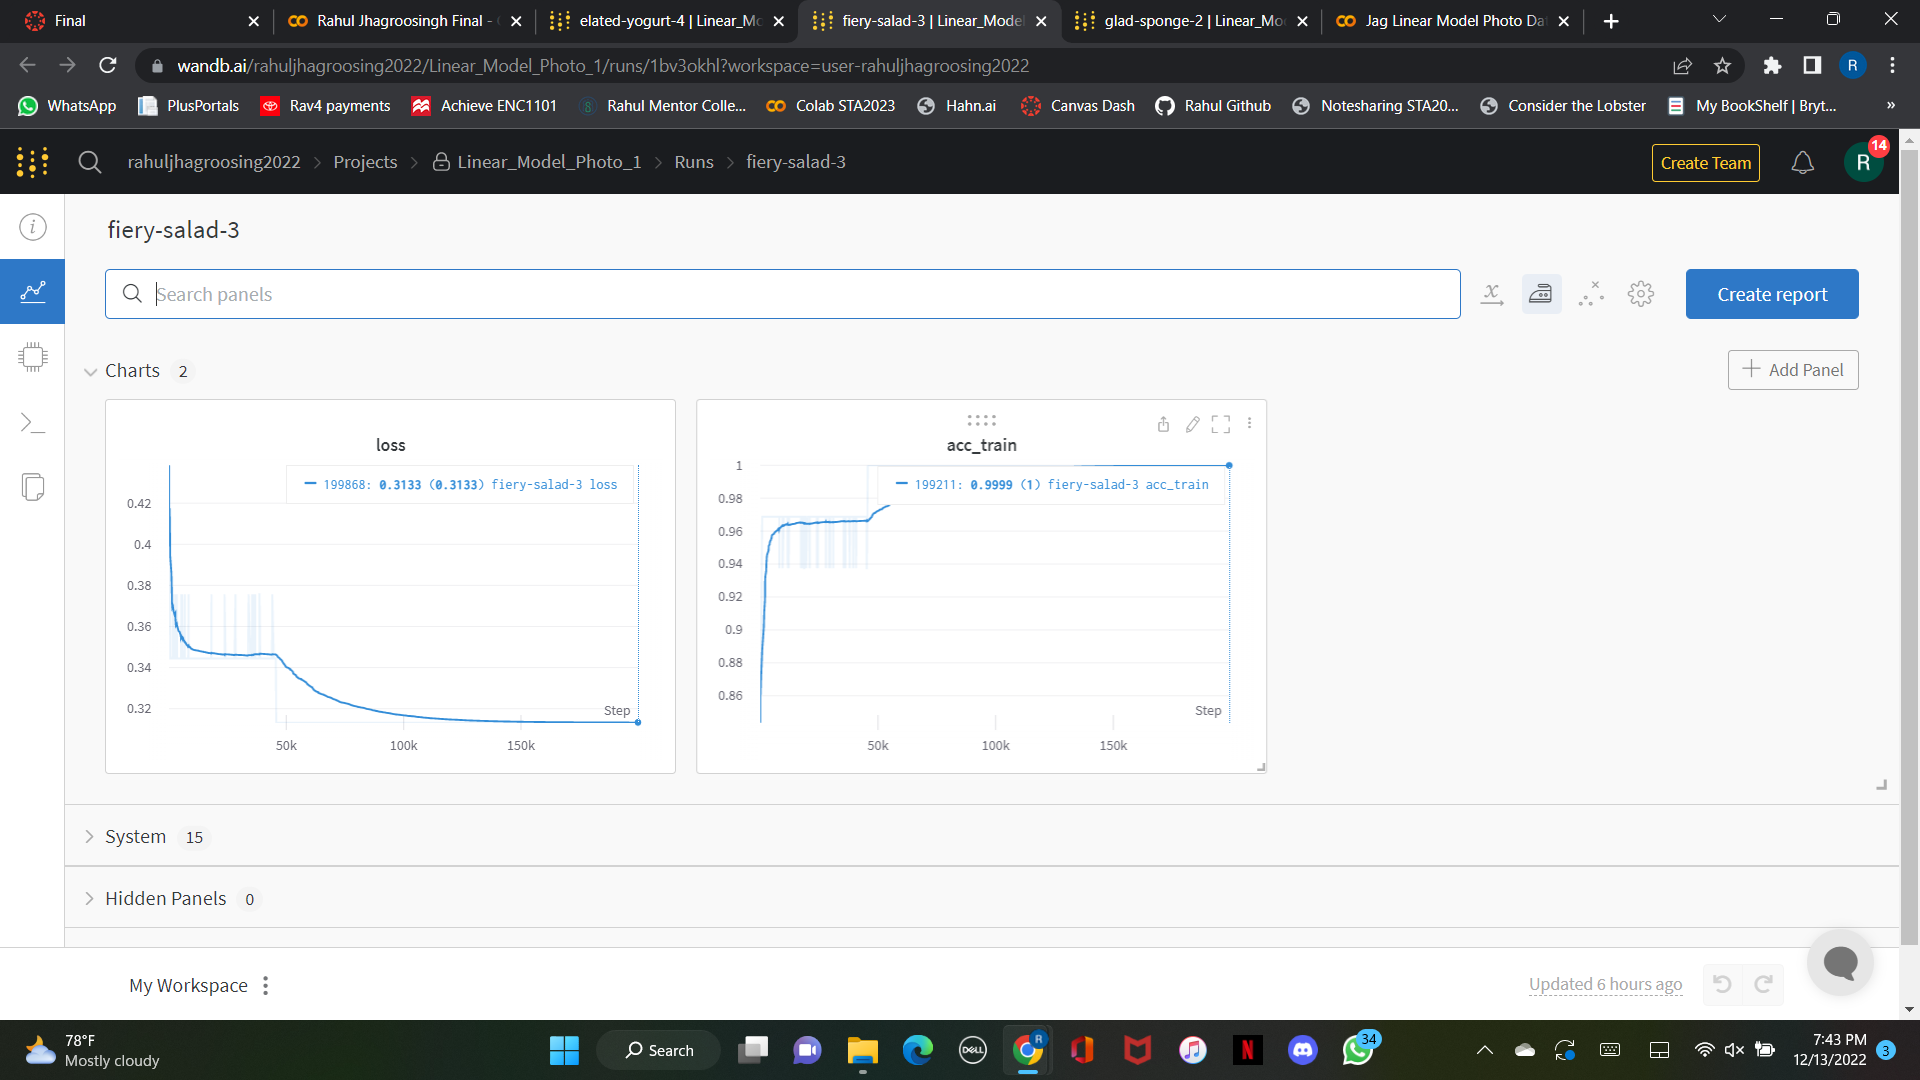

# Worst
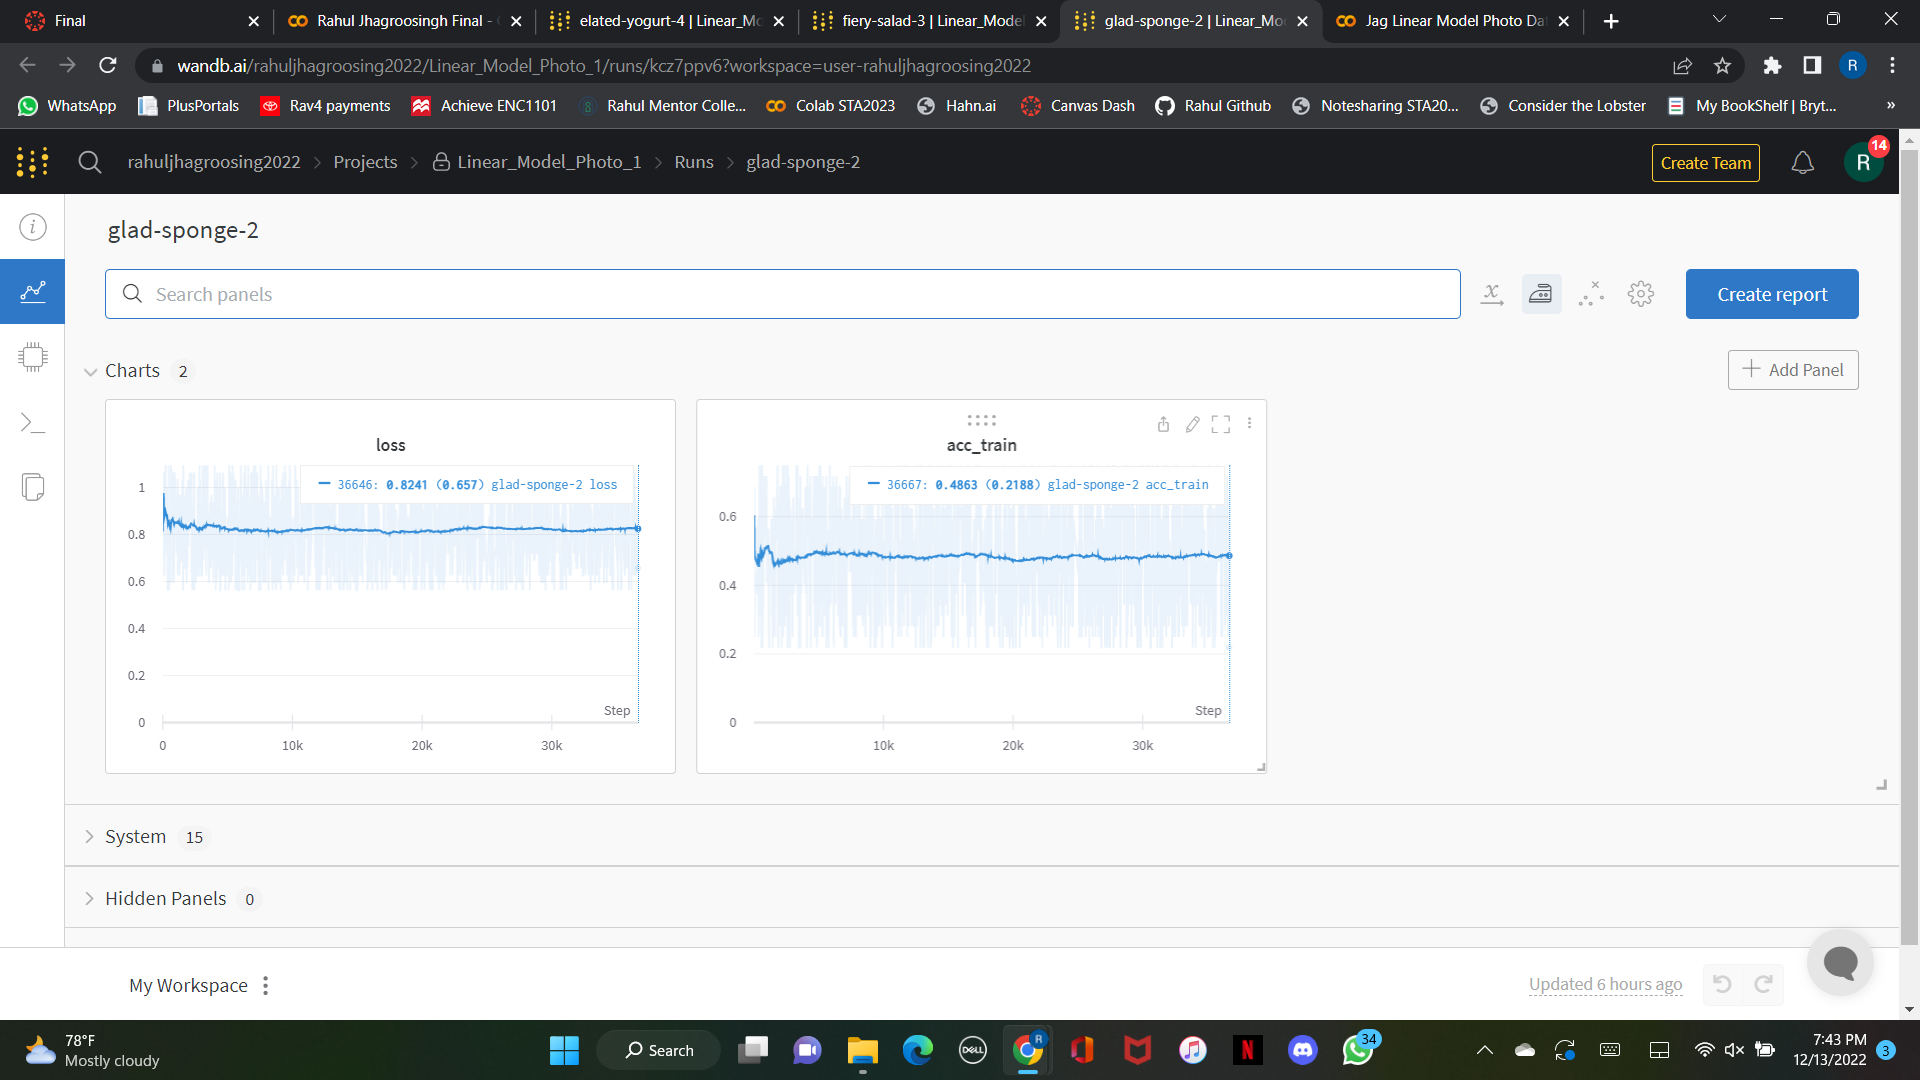

# Average
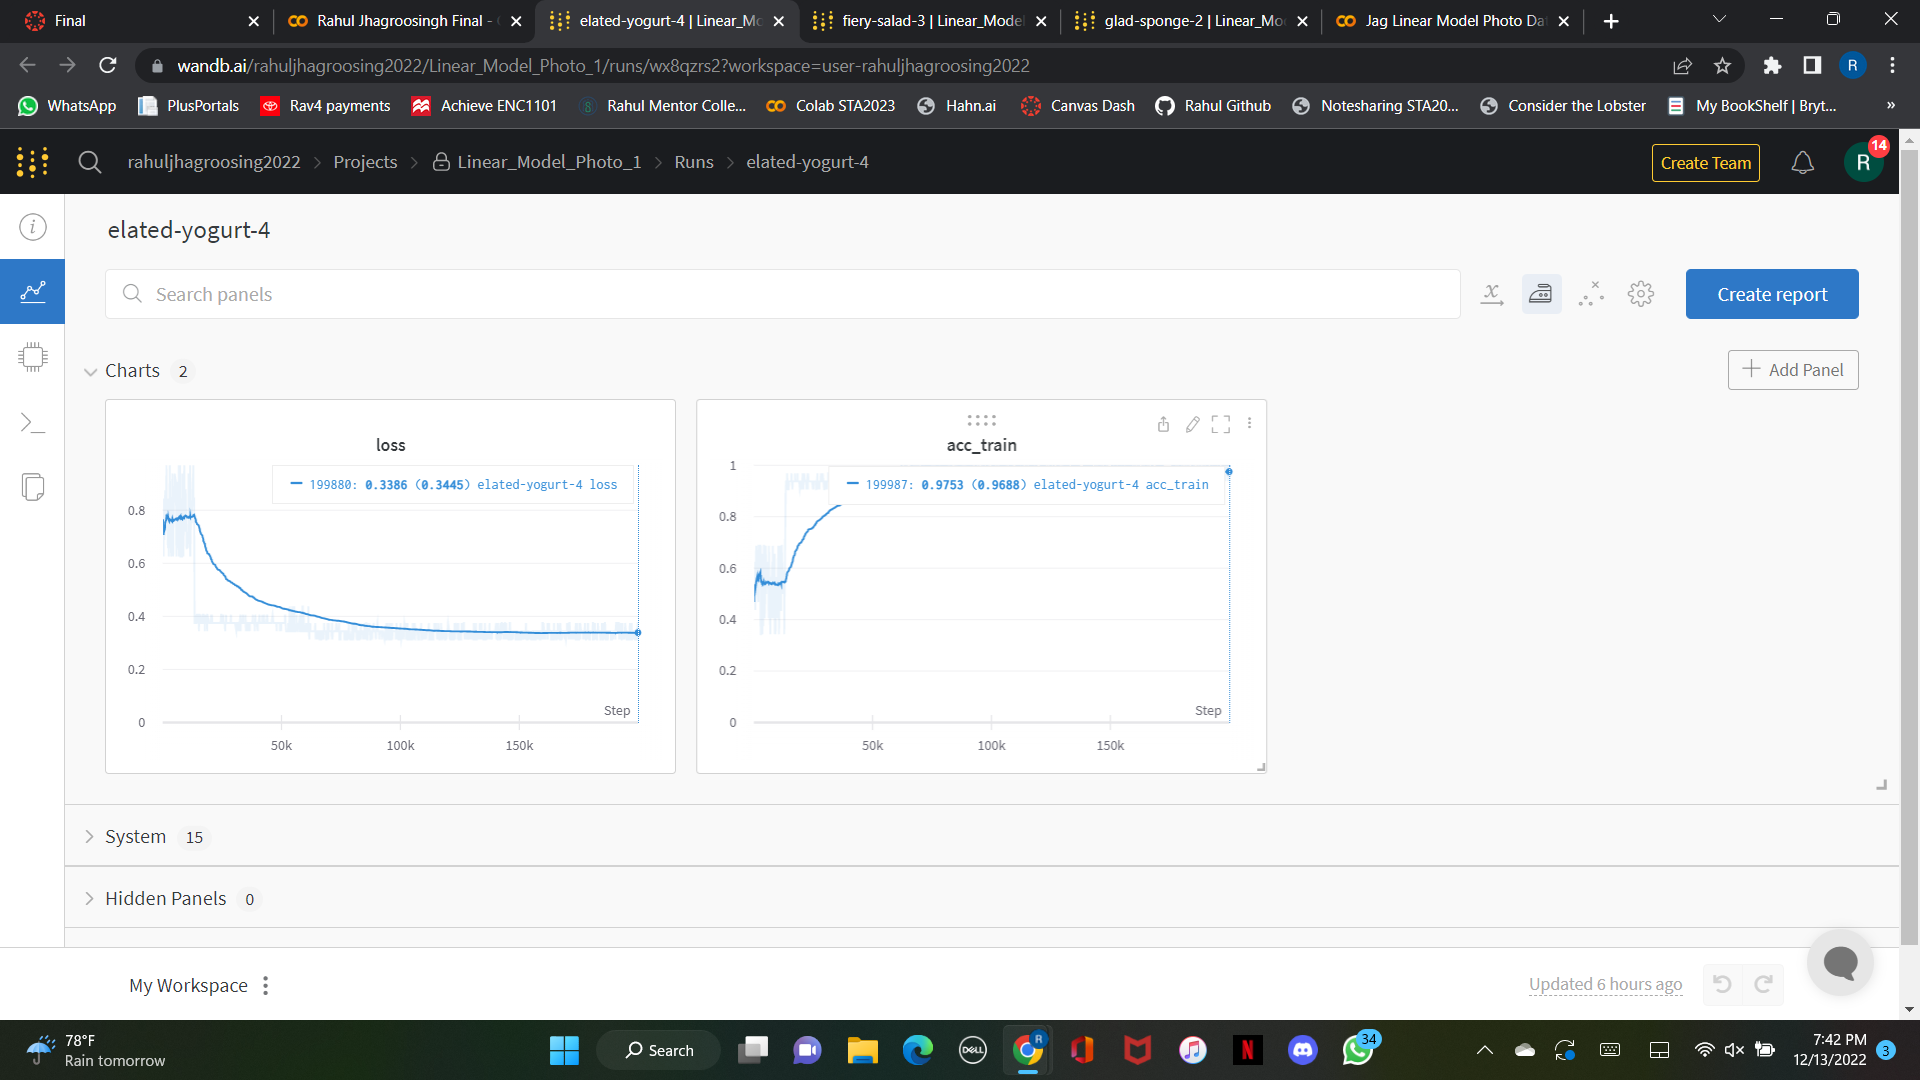

https://tensorspace.org/